# Planets

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")

We ran the head() command for the first observation.

In [2]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


We take a copy of our data set so that it is a backup of our work in case of any other possibility.

In [3]:
df = planets.copy()

In [4]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


We take a look at the structural information of the data set.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


We can also show variable types in this way.

In [6]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

Changing the **object** variable we have to **categorical** it will be better for us to work.

In [8]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [9]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

To access the number of variables and observations of the data set;

In [10]:
df.shape

(1035, 6)

To access only variable names;

In [11]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

For descriptive statistics;

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


We are doing an incomplete observation analysis.

In [14]:
df.isnull().values.any()

True

In [15]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

We can apply equalization to zero or averaging operations to fix missing values. For example, consider the variable "orbital_period". (Equalization to zero)

In [16]:
df["orbital_period"].fillna(0, inplace = True)
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

We can use "mass" for averaging.

In [17]:
df["mass"].fillna(df.mass.mean(), inplace = True)
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

If we want to do this to all values;

In [19]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

However, we are continuing to examine our data set by taking advantage of the backup because we have damaged our data set in a way.

In [20]:
df = planets.copy()
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

To select only the categorical variable;

In [23]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [24]:
kat_df = df.select_dtypes(include = ["object"])

In [25]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


To access the classes and class number of the categorical variable;

In [26]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [27]:
kat_df["method"].value_counts().count()

10

To access the frequency of the classes of the categorical variable;

In [28]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

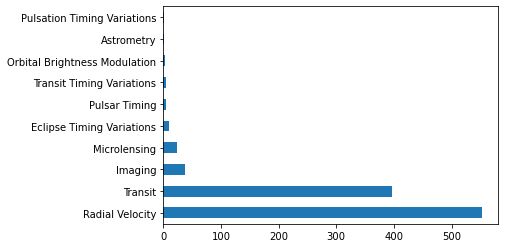

In [33]:
df["method"].value_counts().plot.barh();

Continuous variable summaries;

In [34]:
df_num = df.select_dtypes(include = ["float64","int64"])

In [35]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [36]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [40]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [43]:
print("Average: " + str(df_num["distance"].mean()))
print("Number of Full Observations: " + str(df_num["distance"].count()))
print("Maximum Value: " + str(df_num["distance"].max()))
print("Minimum Value: " + str(df_num["distance"].min()))
print("Median: " + str(df_num["distance"].median()))
print("Standard Deviation: " + str(df_num["distance"].std()))

Average: 264.06928217821786
Number of Full Observations: 808
Maximum Value: 8500.0
Minimum Value: 1.35
Median: 55.25
Standard Deviation: 733.1164929404422
